# Predicting wine quality

*This problem deals with predicting red wine quality. Picking up good wines takes professional sommelier a lot of knowledge and experience, they say. Let us see if __ML can do this job__ for us. The [data](https://archive.ics.uci.edu/ml/datasets/wine+quality) for this problem are the results of a chemical analysis of [vinho verde](https://en.wikipedia.org/wiki/Vinho_Verde) wine samples, from the north of Portugal. __Our goal is to predict wine quality based on physicochemical tests.__ *

![title](grapes_image.jpg)

### Data attributes

--------------------------------------------------------------------------------------------------------------------------------
__Input variables__ (based on physicochemical tests):

- *fixed acidity*
- *volatile acidity*
- *citric acid*
- *residual sugar*
- *chlorides*
- *free sulfur dioxide*
- *total sulfur dioxide*
- *density*
- *pH*
- *sulphates*
- *alcohol*

__Target variable__ (based on sensory data):
- *quality* (score between 0 and 10)
--------------------------------------------------------------------------------------------------------------------------------

### Importing needed packages

In [1]:
# Library for data manipulation and analysis
import pandas as pd

# Library for computations over arrays and matrices
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings :)
import warnings
warnings.filterwarnings("ignore")

### Exploring the data using Pandas

![title](panda.jpg)

- *Load the data from `wine_data.csv`.*

In [2]:
wine_data = pd.read_csv("wine_data.csv", sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- *Get basic information (types of columns, num of entries, etc.) about DataFrame using `info()`.*

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- *Use `describe()` for generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.*

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


![title](parameters.png)

------------

- *Check if there are any missing values, fix them if available.*

In [5]:
wine_data[wine_data.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


*There is no missing data, so we can move forward.*

------------

## Distribution of data

--------------------------------------------------------------------------------------------------------------------------------

### Types of distributions

![title](distributions_types.png)

------------------------------------------------------------------------------------------------------------------------

### First view about spread of the distribution

![title](dispersion.png)

------------

## Measures of symmetry

*__Skewness__ and __kurtosis__ are the most important data characteristics related to the symmetry of the data. More precisely, skewness represents the lack of symmetry (asymmetry) and kurtosis tells us whether data tend to have heavy tails (outliers). The lower kurtosis is, less outliers we have.*

![title](skewness_kurtosis.jpg)

### Sample skewness (Fisher-Pearson coefficient of skewness)

The direction of __skewness__ is given by the sign. The coefficient compares the sample distribution with a normal distribution. The larger the value, the larger the distribution differs from a normal distribution.

__skewness = 0__ : *normally distributed.*

__skewness > 0__ : *more weight in the left tail of the distribution.*

__skewness < 0__ : *more weight in the right tail of the distribution.*

--------------------------------------------------------------------------------------------------------------------------------

### Sample kurtosis (Fisher kurtosis)

The __kurtosis__ parameter is a measure of the combined weight of the tails relative to the rest of the distribution. It measures the tail-heaviness of the distribution. If the kurtosis is close to 0, then a normal distribution is often assumed. If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution. If the kurtosis is lower than zero, then the distribution has lighter tails and is called a playkurtic distribution.

__kurtosis = 0__ : *normally distributed.*

__kurtosis > 0__ : *heavy-tailed.*

__kurtosis < 0__ : *light-tailed.*

--------------------------------------------------------------------------------------------------------------------------------

### Histograms

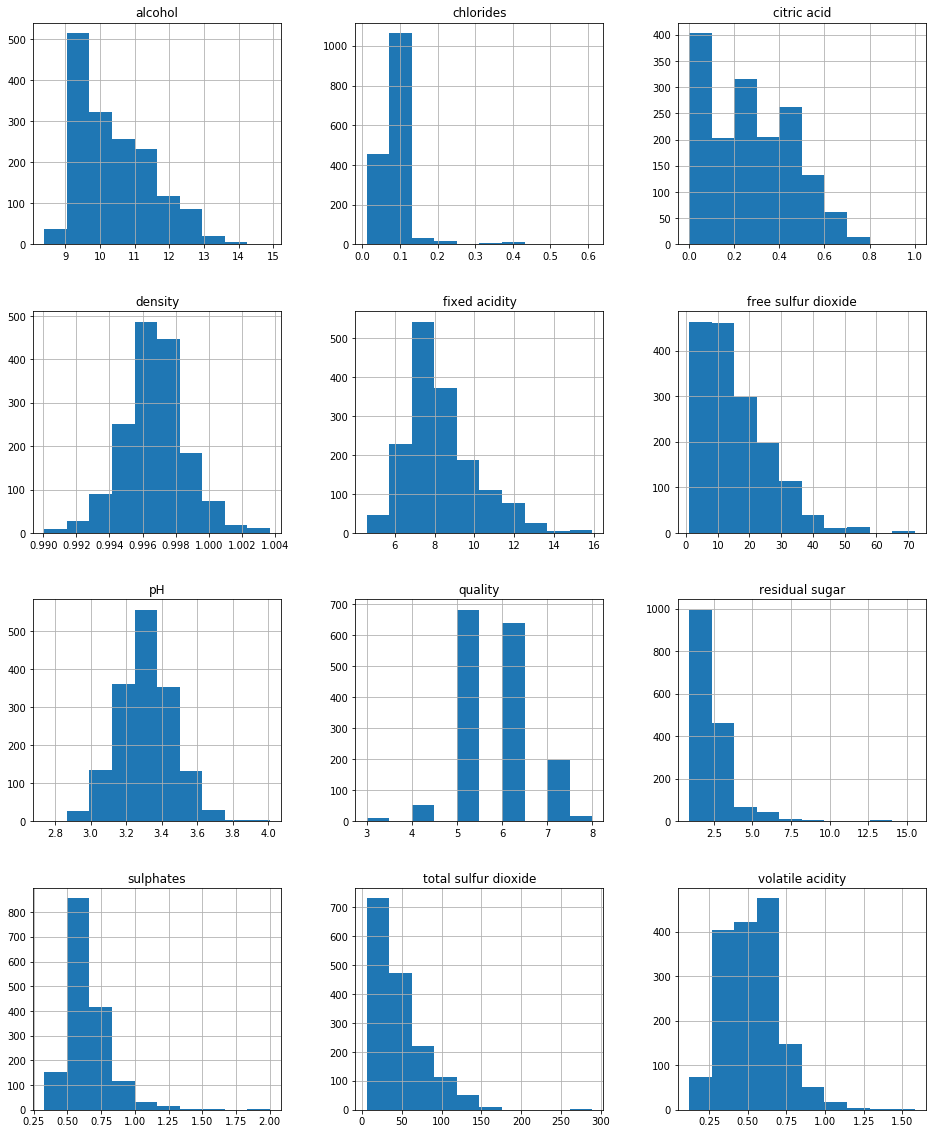

In [6]:
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()
wine_data.hist(ax = ax);

------------

### Understanding Boxplot

![title](boxplot.png)

------------

### Boxplots

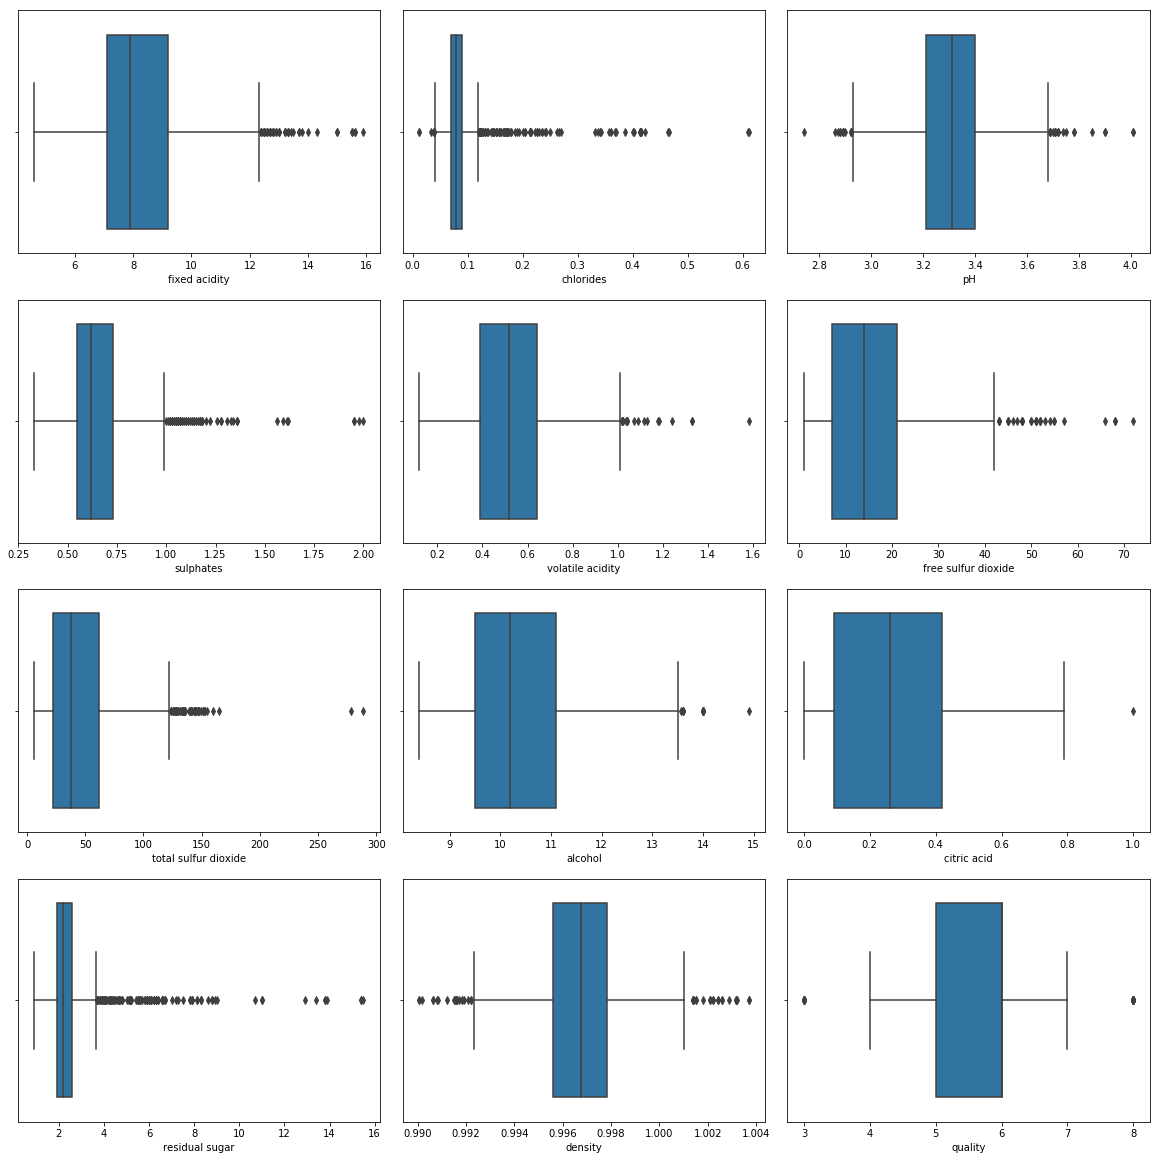

In [7]:
num_cols, num_rows = 3, 4
fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(16, 16), constrained_layout=True)

for i, column in enumerate(wine_data.columns):    
    sns.boxplot(wine_data[column], ax=ax[i % num_rows][i % num_cols]);

------------

### Distribution of data with respect to target variable (quality)

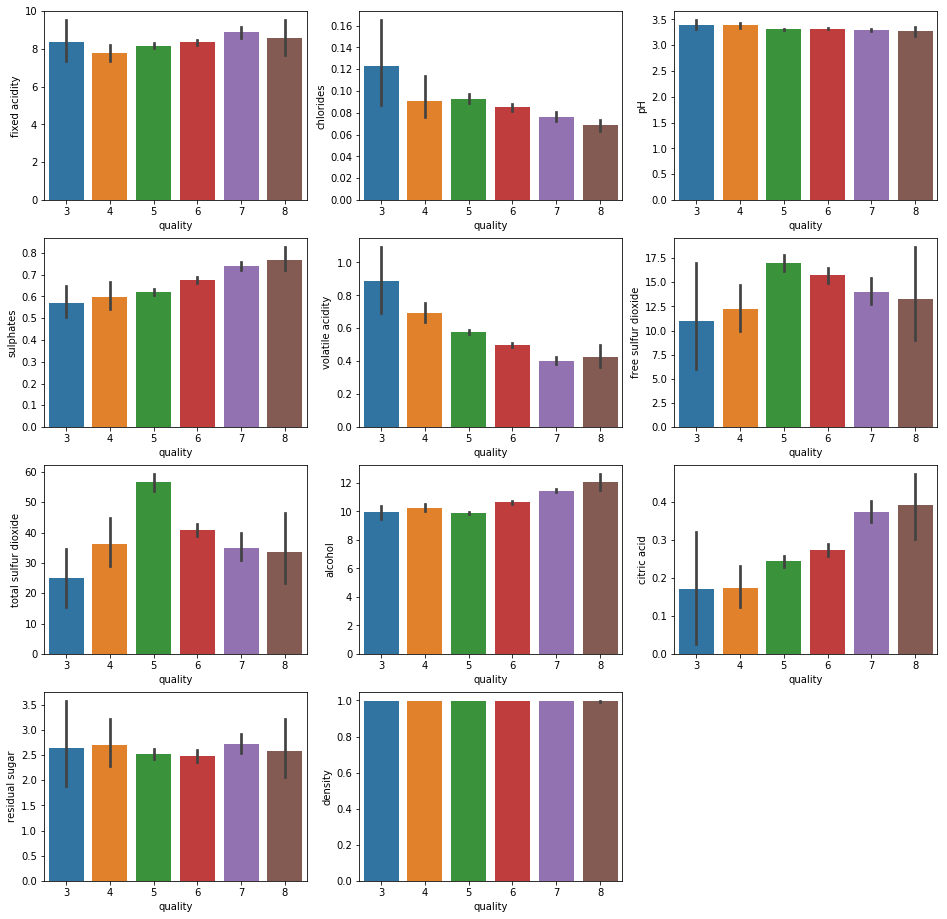

In [8]:
num_cols, num_rows = 3, 4
fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(16, 16))

# Removing redundant subplot
fig.delaxes(ax[3][2])

for i, column in enumerate(wine_data.columns[:-1]):    
    sns.barplot(x='quality', y=column, data=wine_data, ax=ax[i % num_rows][i % num_cols]);

__We can make few conclusions from the plots above:__

- *__Fixed acidity__ does not give any specification to classify the quality.*
- *Composition of __chlorides__ go down as we go higher in the quality of the wine.*
- *__pH__ very slowly decreases with increasing of quality of the wine.*
- *__Sulphates__ level goes higher with the increasing quality of the wine.*
- *There is quite a downing trend in the __volatile acidity__ as we go higher in the quality.*
- *__Free sulfur dioxide__ doesn't have any specific pattern in the wine quality.*
- *__Total sulfur dioxide__ doesn't have any specific pattern in the wine quality.*
- *__Alcohol__ level goes higher as the quality of wine increases.*
- *Composition of __citric acid__ go higher as we go higher in the quality of the wine.*
- *__Residual sugar__ does not give any specification to classify the quality.*
- *__Density__ doesn't give as any valuable information about wine quality.*

------------

### Relation between variables

*In datasets with a small number of features, Seaborn `pairplot()` can quickly enable a visual inspection of any relationships between variables. __Graphs along the main diagonal represent the distribution of each feature, while graphs outside diagonals show the relationship between variables.__*

*For this plot we would not use features, that we found out have no some specific pattern considering quality of the wine.*

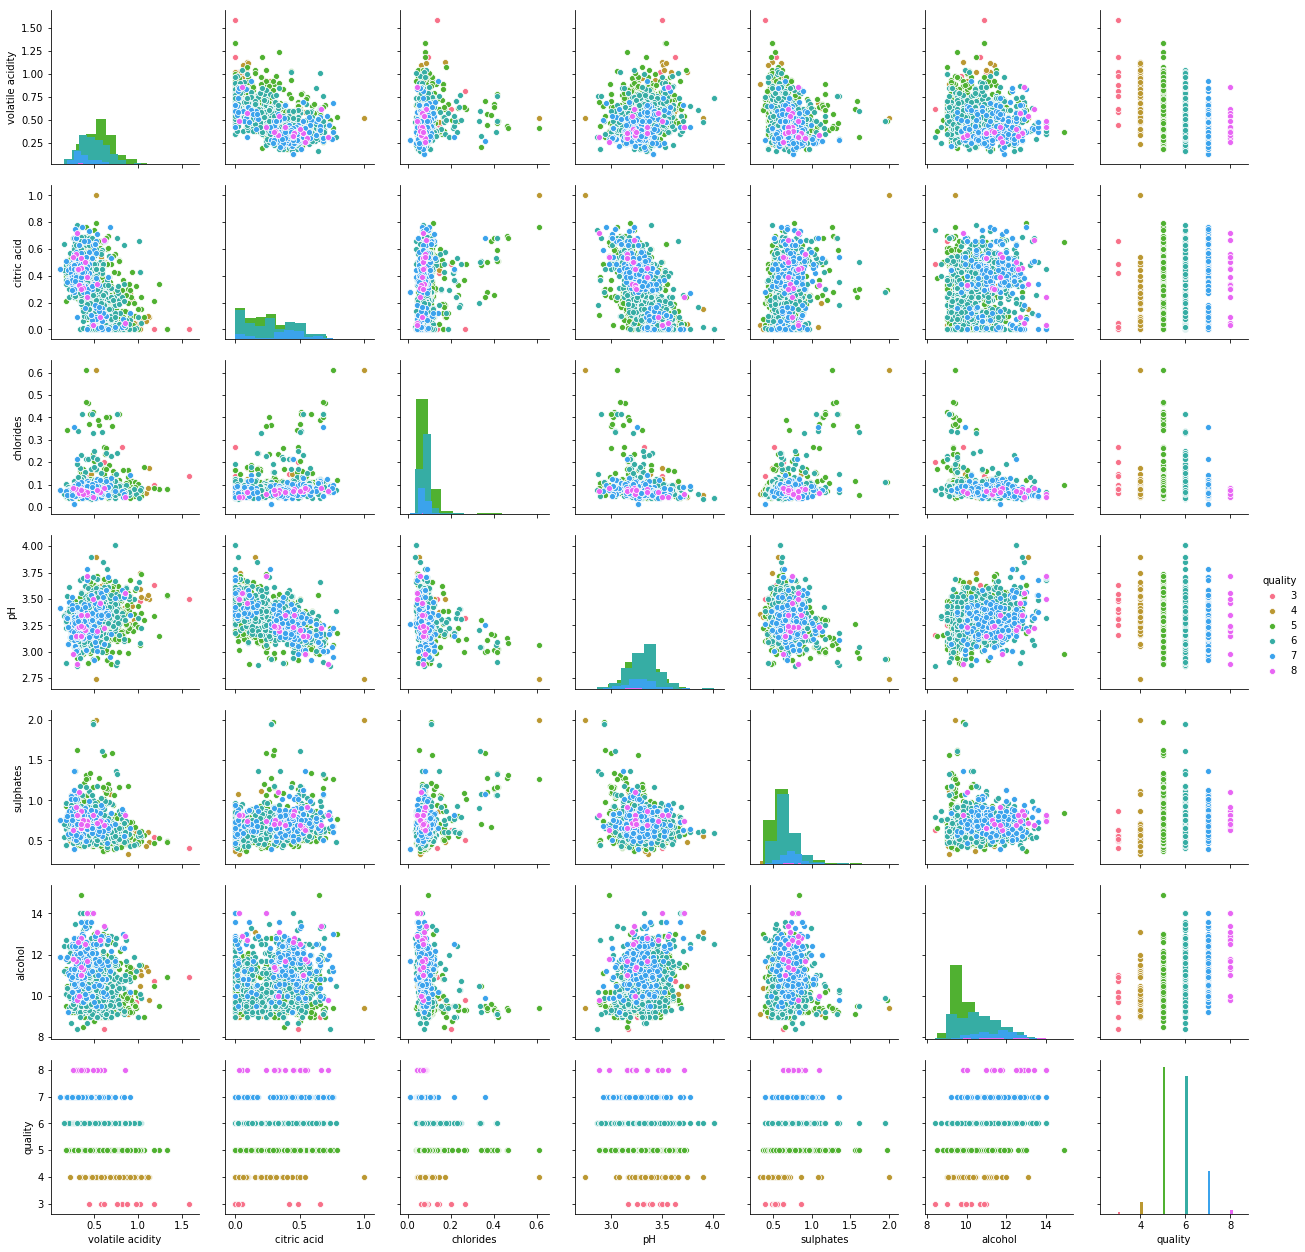

In [9]:
insignificant_features = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'residual sugar', 'density']
wine_data_specific = wine_data.loc[:, ~wine_data.columns.isin(insignificant_features)]

sns.pairplot(wine_data_specific, hue="quality", diag_kind='hist', palette="husl");

------------

### Pearson and Spearman correlation coefficients

![title](pearson_correlation.png)

------------

![title](spearman_correlation.png)

------------

### Zero correlation

![title](zero_correlation.png)

------------

First, we will use the method `corr()` on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to `heatmap()` from seaborn, which renders a color-coded matrix for the provided values.

__Pearson correlation coefficient__

*The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.*

In [10]:
corr_matrix_pearson = wine_data.corr(method='pearson')

__Spearman correlation coefficient__

*The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.*

In [11]:
corr_matrix_spearman = wine_data.corr(method='spearman')

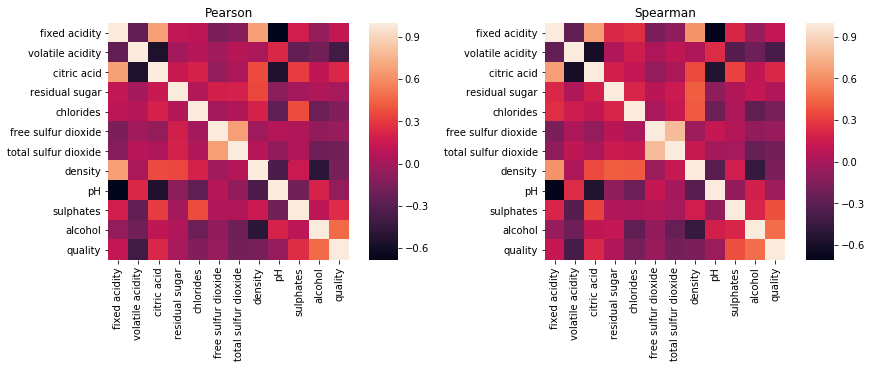

In [12]:
fig, ax = plt.subplots(1, ncols=2, figsize=(12, 5), constrained_layout=True)

# Adding subtitles
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Spearman')

# Plotting correlation matrices
sns.heatmap(corr_matrix_pearson, ax=ax[0])
sns.heatmap(corr_matrix_spearman, ax=ax[1]);

------------

### Reasons to get rid of highly correlated features

*__Highly correlated features do not contain valuable information.__*

*__To make the learning algorithm faster without losing model's performance.__*

*__The less features we have, the more interpretable our model is.__*

*__Dealing with curse of high dimensionality.__*

### Dividing data on good and bad quality wine (Testing hypothesis)

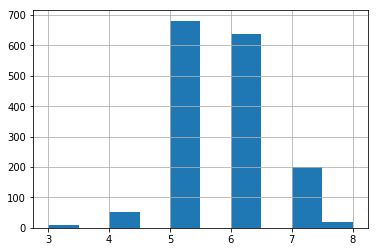

In [13]:
wine_data['quality'].hist();

*As we can see from wine quality distribution, we can divide it almost equally on 2 groups:*

- *__good__*: quality > 5
- *__bad__* : quality <= 5

*That is done, because we have assumptions that some variables correlate with one of groups and now we can test this hypothesis.*

In [14]:
# Dividing samples on good and bad quality wine

wine_data['Quality Type'] = wine_data['quality'].apply(lambda x: 'Good' if x > 5 else 'Bad')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad


In [15]:
hypothesis_insignificant_features = ['quality']
wine_data_hypothesis = wine_data.loc[:, ~wine_data.columns.isin(hypothesis_insignificant_features)]

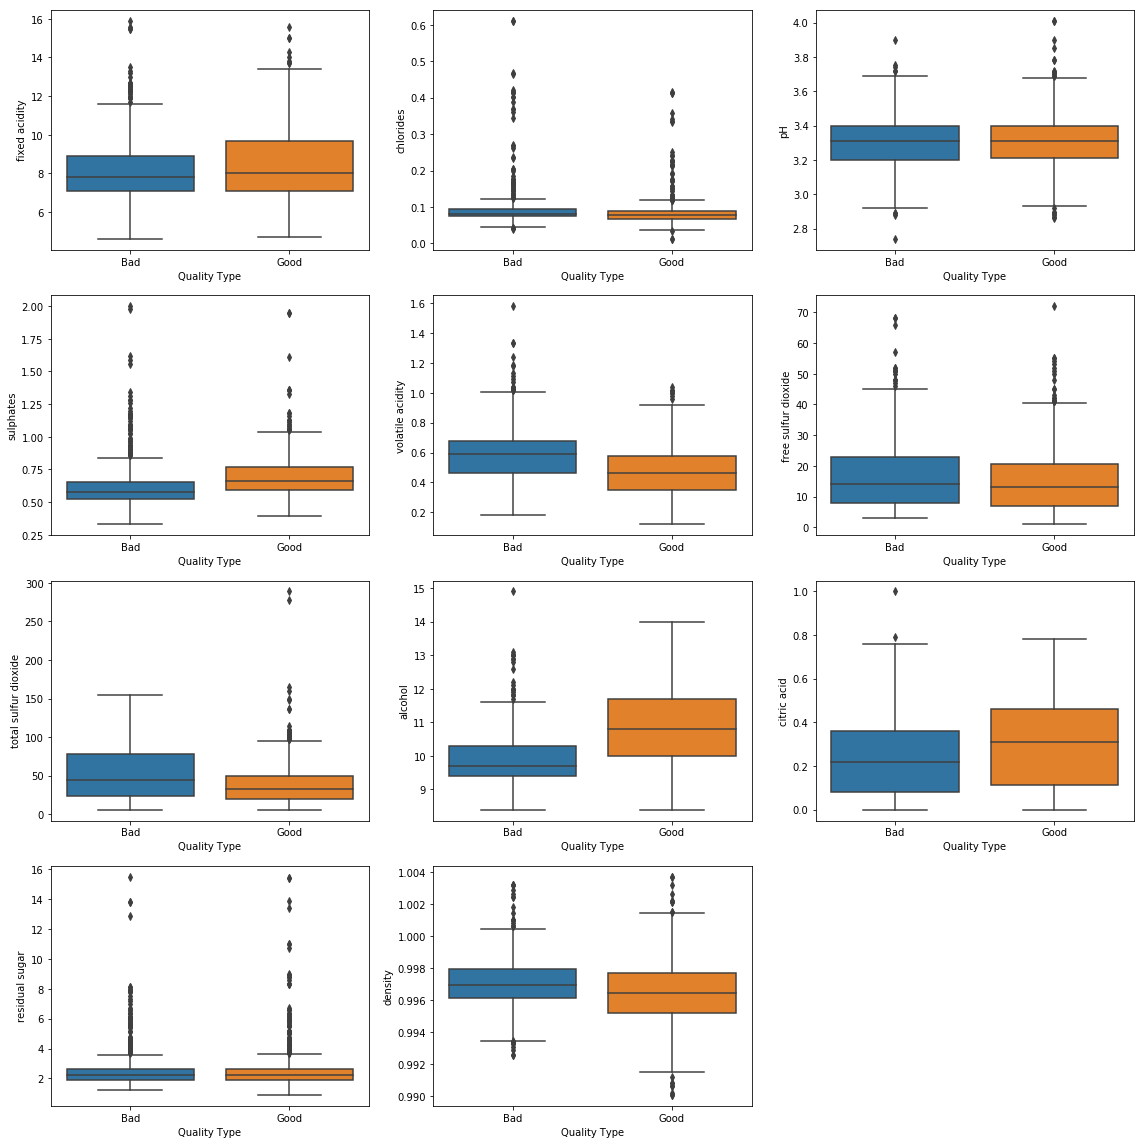

In [16]:
num_cols, num_rows = 3, 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))

# Removing redundant subplot
fig.delaxes(axes[3][2])

for i, column in enumerate(wine_data_hypothesis.columns):
    if i != len(wine_data_hypothesis.columns) - 1:
        ax = axes[i % num_rows][i % num_cols]
        sns.boxplot(x='Quality Type', y=column, data=wine_data_hypothesis, ax=ax)
        ax.set_xlabel('Quality Type')
        ax.set_ylabel(column)
fig.tight_layout();

------------

## Why we need cross-validation?

![title](overfitting.png)

------------

## Cross-validation

![title](cv.png)

------------

![title](cv_2.png)

------------

In [17]:
X = wine_data.loc[:, ~wine_data.columns.isin(['quality', 'Quality Type'])]
y = wine_data['quality']

X.shape, y.shape

((1599, 11), (1599,))

### Hold-out validation

In [18]:
from sklearn.model_selection import train_test_split

# Split training and test data
X_available, X_test, y_available, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_available, y_available, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(1023, 11) (1023,)
(320, 11) (320,)
(256, 11) (256,)


------------

### K-fold cross validation

*In __K-fold Cross Validation__ we split our data into __k__ different subsets (or folds). We use __k-1__ subsets to train our data and leave the last subset (or the last fold) as test data. We then __average__ the model against each of the folds and then finalize our model.*

![title](k_fold.png)

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42) # Define the split - into N folds 
kf.get_n_splits(X_available, y_available) # Returns the number of splitting iterations in the cross-validator

print(kf)

KFold(n_splits=5, random_state=42, shuffle=False)


------------

### Stratified K-fold cross validation

*__Stratified K-fold cross validation__ is a variation of KFold that returns stratified folds. The folds are made by __preserving the percentage of samples for each class__.*

![title](stratified_k_fold.png)

In [20]:
from sklearn.model_selection import StratifiedKFold

st_kf = StratifiedKFold(n_splits=5, random_state=42) # Define the split - into N folds 
st_kf.get_n_splits(X_available, y_available) # Returns the number of splitting iterations in the cross-validator

print(st_kf)

StratifiedKFold(n_splits=5, random_state=42, shuffle=False)


------------

## Training models

### Hold-out CV

### XGBoost

In [21]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(max_depth=20, gamma=0.5, min_child_weight=5, subsample=1, colsample_bytree=1, reg_lambda=2)
xgb_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0.5, learning_rate=0.1,
              max_delta_step=0, max_depth=20, min_child_weight=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=2, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

### Making predictions

In [22]:
xgb_train_predicted = xgb_classifier.predict(X_train)
xgb_val_predicted = xgb_classifier.predict(X_val)
xgb_test_predicted = xgb_classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

xgb_train_acc = accuracy_score(y_train, xgb_train_predicted)
xgb_val_acc = accuracy_score(y_val, xgb_val_predicted)
xgb_test_acc = accuracy_score(y_test, xgb_test_predicted)

print('Train acuracy : ', xgb_train_acc)
print('CV accuracy : ',   xgb_val_acc)
print('Test accuracy : ',   xgb_test_acc)

Train acuracy :  0.9804496578690127
CV accuracy :  0.69921875
Test accuracy :  0.659375


### K-fold CV

In [24]:
kf_train_accs, kf_val_accs, kf_test_accs = [], [], []

for train_indices, val_indices in kf.split(X_available):
    
    # Features
    X_train = X_available[X_available.index.isin(train_indices)]
    X_val = X_available[X_available.index.isin(val_indices)]
    
    # Target variable
    y_train = y_available[y_available.index.isin(train_indices)]
    y_val = y_available[y_available.index.isin(val_indices)]
    
    xgb_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
    
    xgb_train_predicted = xgb_classifier.predict(X_train)
    xgb_val_predicted = xgb_classifier.predict(X_val)
    xgb_test_predicted = xgb_classifier.predict(X_test)
    
    xgb_train_acc = accuracy_score(y_train, xgb_train_predicted)
    xgb_val_acc = accuracy_score(y_val, xgb_val_predicted)
    xgb_test_acc = accuracy_score(y_test, xgb_test_predicted)
    
    kf_train_accs.append(xgb_train_acc)
    kf_val_accs.append(xgb_val_acc)
    kf_test_accs.append(xgb_test_acc)
    
avg_kf_train_acc = np.mean(kf_train_accs) 
avg_kf_val_acc = np.mean(kf_val_accs)
avg_kf_test_acc = np.mean(kf_test_accs)

In [25]:
print('Train acuracy (avg over folds) : ', avg_kf_train_acc)
print('CV accuracy (avg over folds)   : ',   avg_kf_val_acc)
print('Test accuracy (avg over folds) : ',   avg_kf_test_acc)

Train acuracy (avg over folds) :  0.9785352499876913
CV accuracy (avg over folds)   :  0.5465293993463665
Test accuracy (avg over folds) :  0.6299999999999999


### Stratified K-fold CV

In [26]:
st_kf_train_accs, st_kf_val_accs, st_kf_test_accs = [], [], []

for train_indices, val_indices in st_kf.split(X_available, y_available):
    
    # Features
    X_train = X_available[X_available.index.isin(train_indices)]
    X_val = X_available[X_available.index.isin(val_indices)]
    
    # Target variable
    y_train = y_available[y_available.index.isin(train_indices)]
    y_val = y_available[y_available.index.isin(val_indices)]
    
    xgb_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
    
    xgb_train_predicted = xgb_classifier.predict(X_train)
    xgb_val_predicted = xgb_classifier.predict(X_val)
    xgb_test_predicted = xgb_classifier.predict(X_test)
    
    xgb_train_acc = accuracy_score(y_train, xgb_train_predicted)
    xgb_val_acc = accuracy_score(y_val, xgb_val_predicted)
    xgb_test_acc = accuracy_score(y_test, xgb_test_predicted)
    
    st_kf_train_accs.append(xgb_train_acc)
    st_kf_val_accs.append(xgb_val_acc)
    st_kf_test_accs.append(xgb_test_acc)
    
avg_st_kf_train_acc = np.mean(st_kf_train_accs) 
avg_st_kf_val_acc = np.mean(st_kf_val_accs)
avg_st_kf_test_acc = np.mean(st_kf_test_accs)

In [27]:
print('Train acuracy (avg over folds) : ', avg_st_kf_train_acc)
print('CV accuracy (avg over folds)   : ',   avg_st_kf_val_acc)
print('Test accuracy (avg over folds) : ',   avg_st_kf_test_acc)

Train acuracy (avg over folds) :  0.9778093806850364
CV accuracy (avg over folds)   :  0.538501524359925
Test accuracy (avg over folds) :  0.626875


------------